In [5]:
import keras

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
import glob
import random
import base64
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from io import BytesIO
from IPython.display import HTML


from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [7]:
import numpy as np
import os,cv2,random,time,shutil,csv
import tensorflow as tf
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from tqdm import tqdm

In [8]:
import json,os,cv2,keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import BatchNormalization,Dense,GlobalAveragePooling2D,Lambda,Dropout,InputLayer,Input
from tensorflow.keras.utils import to_categorical,plot_model
from tensorflow.keras.preprocessing.image import load_img

In [9]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

In [10]:
path = r"C:/Users/gigig/Downloads/data"
labels_csv_path = "C:/Users/gigig/Downloads/data/labels (1).csv"
sample_submission_csv_path = "C:/Users/gigig/Downloads/data/sample_submission.csv"
submission_csv_path =  "C:/Users/gigig/Downloads/sample_submission.csv"
train_path ="C:/Users/gigig/Downloads/data/train data"
test_path = "C:/Users/gigig/Downloads/data/test data"

number_of_epochs = 10

print(f'Constants are set. Fine tuning takes {number_of_epochs} epochs.')

Constants are set. Fine tuning takes 10 epochs.


In [11]:
labels_df = pd.read_csv(labels_csv_path)
samp_subm = pd.read_csv(submission_csv_path)
print(f'The shape of the labels: {labels_df.shape}')

The shape of the labels: (10222, 2)


In [12]:
labels_df.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [13]:
print(len(os.listdir(train_path)))

10222


In [14]:
print(len(os.listdir(test_path)))

10357


In [15]:
unique_breeds = pd.unique(labels_df['breed'])
print(len(unique_breeds))

120


In [16]:
each_label = labels_df.groupby("breed").count()
each_label = each_label.rename(columns = {"id" : "count"})
each_label = each_label.sort_values("count", ascending=False)
each_label

count
breed                      
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
...                     ...
golden_retriever         67
brabancon_griffon        67
komondor                 67
briard                   66
eskimo_dog               66

[120 rows x 1 columns]

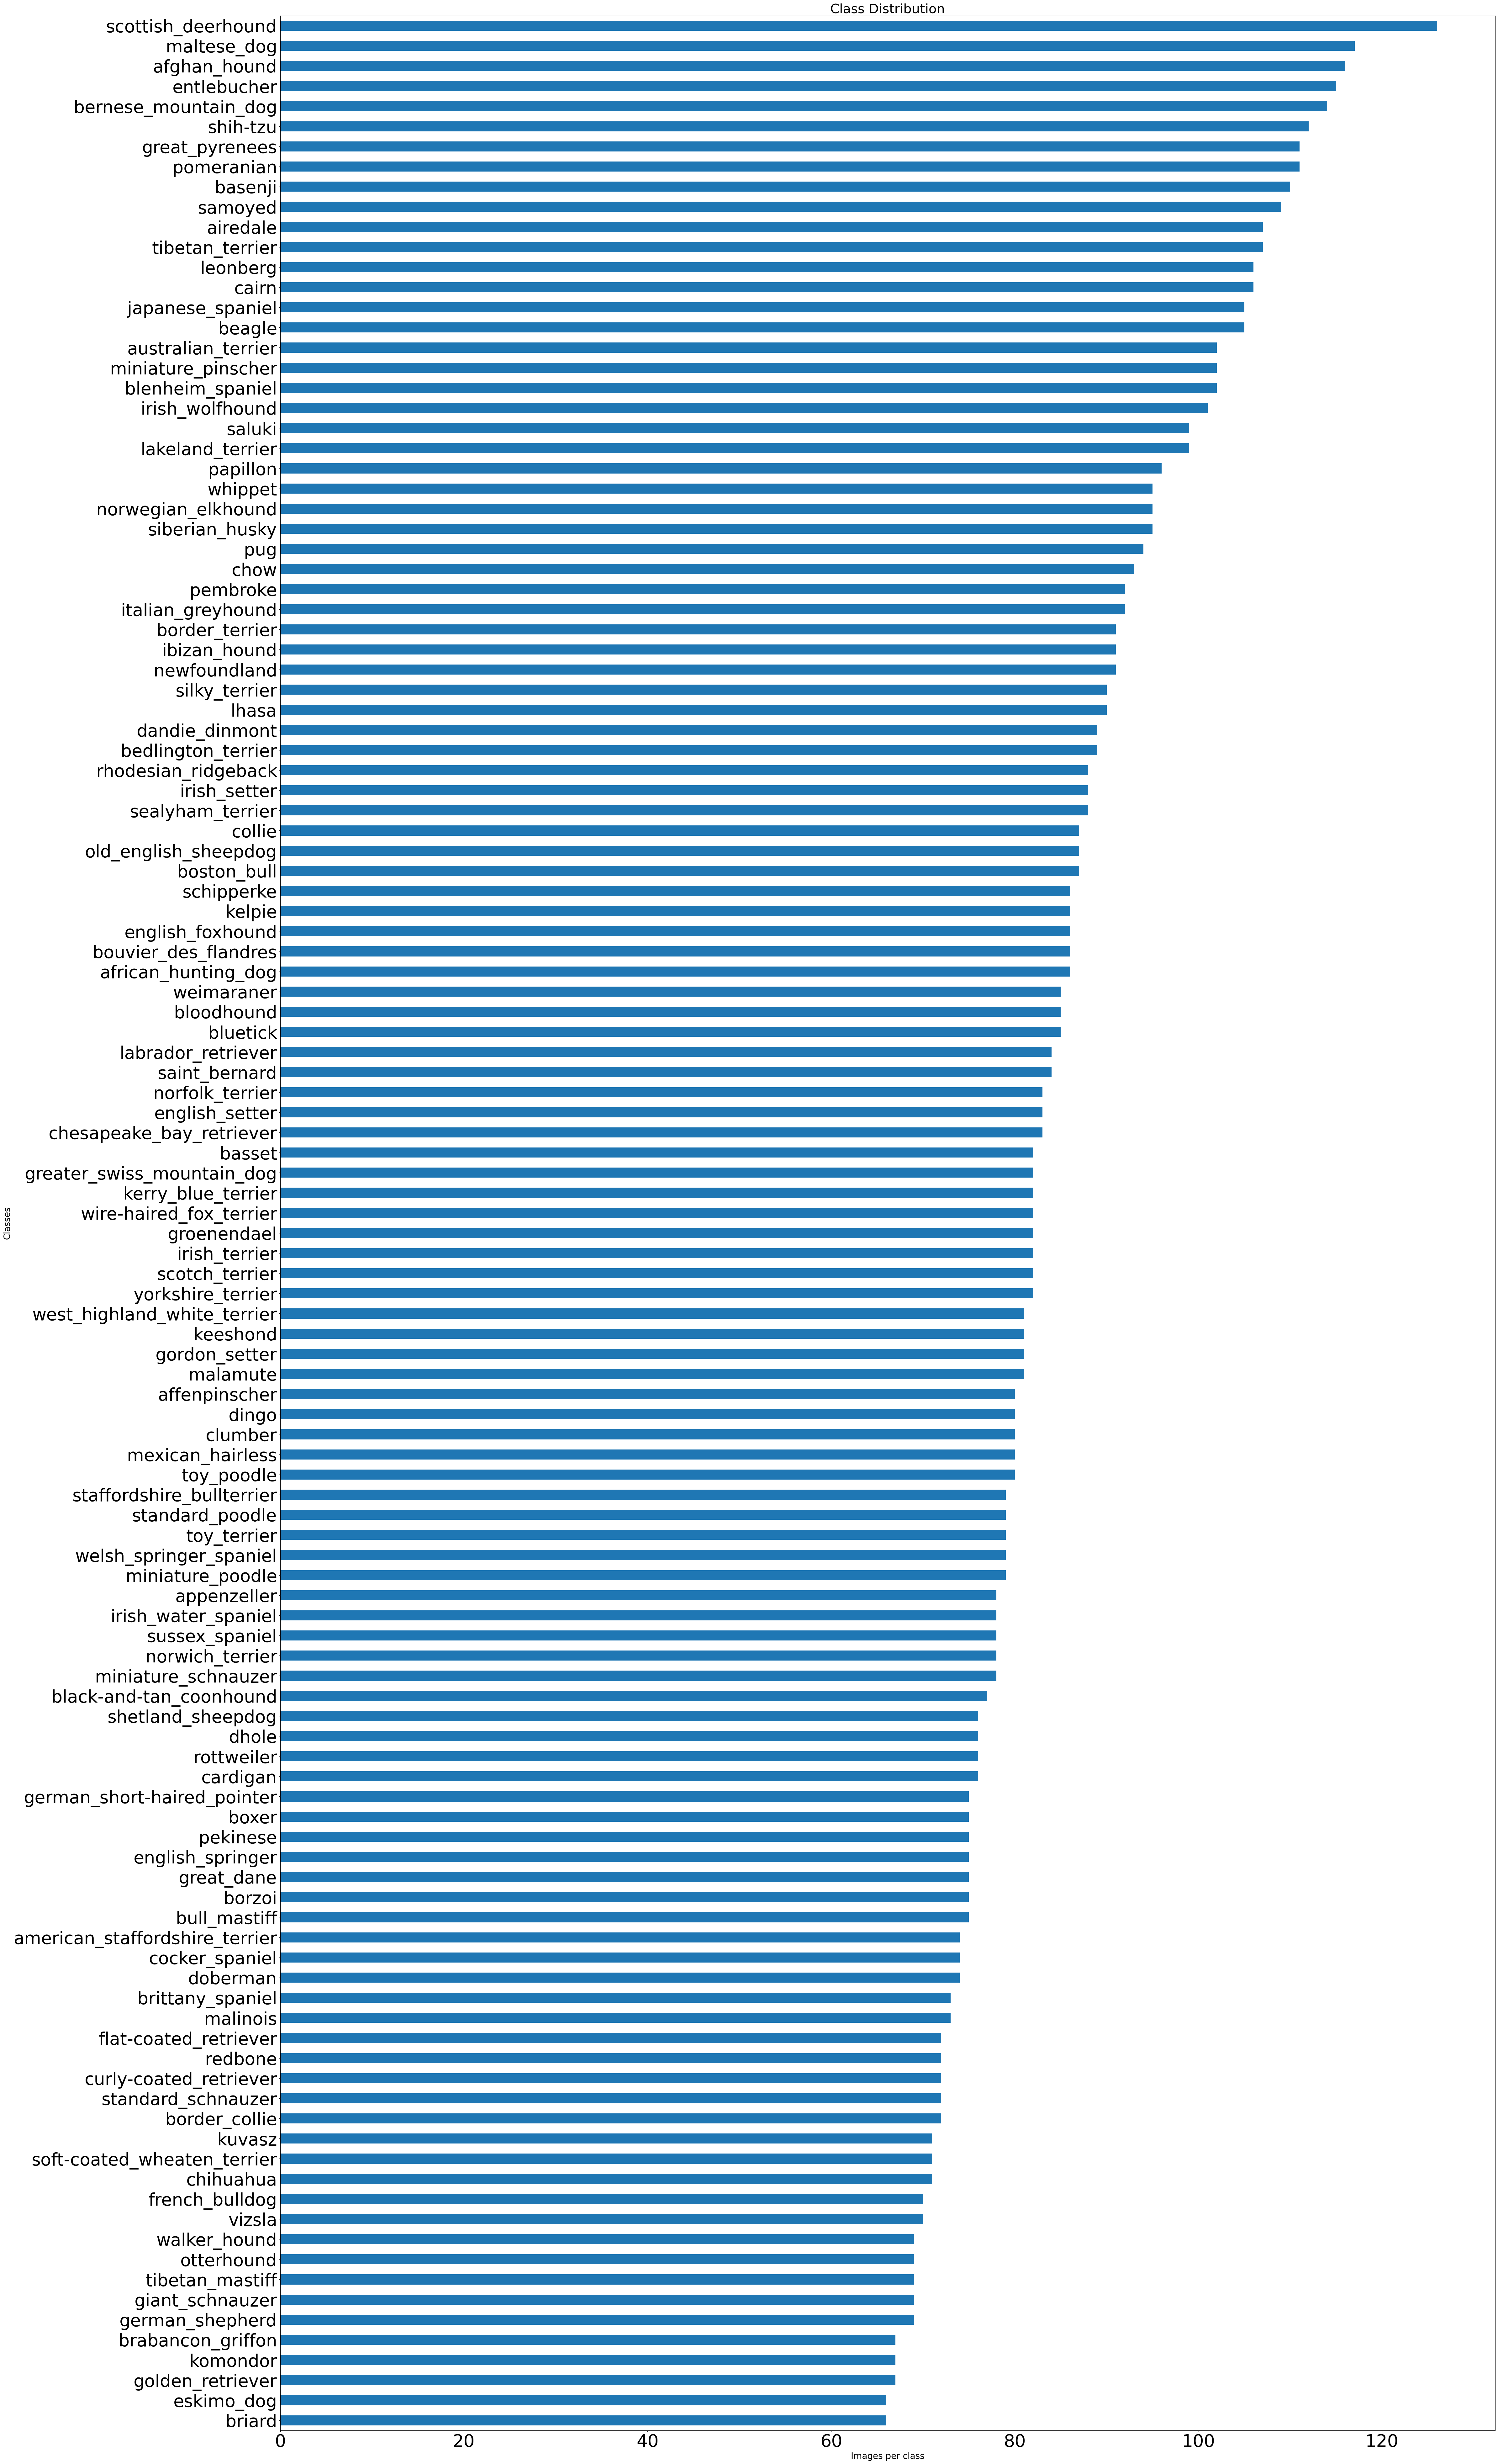

In [17]:
ax=pd.value_counts(labels_df['breed'],ascending=True).plot(kind='barh',
                                                       fontsize="40",
                                                       title="Class Distribution",
                                                       figsize=(50,100))
ax.set(xlabel="Images per class", ylabel="Classes")
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(30)


In [18]:
pd.set_option('display.max_colwidth', -1)

def get_thumbnail(path):
    i = Image.open(path)
    i.thumbnail((150, 150), Image.LANCZOS)
    return i

def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

C:\Users\gigig\AppData\Local\Temp\ipykernel_18676\1694978098.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [19]:
dogs = pd.read_csv("C:/Users/gigig/Downloads/data/labels (1).csv")
dogs = dogs.sample(20)
dogs['file'] = dogs.id.map(lambda id: f'C:/Users/gigig/Downloads/data/train data/{id}.jpg')
dogs['image'] = dogs.file.map(lambda f: get_thumbnail(f))
dogs.head()

C:\Users\gigig\AppData\Local\Temp\ipykernel_18676\1694978098.py:5: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  i.thumbnail((150, 150), Image.LANCZOS)


id                breed  \
10034  fba676383a9e3dd93dc1c4d50c54f48f  norwegian_elkhound    
183    044644ffbec4b6d402eb824532478811  african_hunting_dog   
2526   3ef5dfcc20dfea1c49554fc8f2f11b20  great_dane            
540    0d4e09456d9ebfdb076e34326586f18e  brittany_spaniel      
5073   80916993d582c4db7bb90bcdb768e31f  saint_bernard         

                                                                                file  \
10034  C:/Users/gigig/Downloads/data/train data/fba676383a9e3dd93dc1c4d50c54f48f.jpg   
183    C:/Users/gigig/Downloads/data/train data/044644ffbec4b6d402eb824532478811.jpg   
2526   C:/Users/gigig/Downloads/data/train data/3ef5dfcc20dfea1c49554fc8f2f11b20.jpg   
540    C:/Users/gigig/Downloads/data/train data/0d4e09456d9ebfdb076e34326586f18e.jpg   
5073   C:/Users/gigig/Downloads/data/train data/80916993d582c4db7bb90bcdb768e31f.jpg   

                                                                                  image  
10034  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=150x113 at 0x28FE242EFD0>  
183    <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=150x100 at 0x28FE242E760>  
2526   <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=150x114 at 0x28FE242ED30>  
540    <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=150x113 at 0x28FE242EB50>  
5073   <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=112x150 at 0x28FE242EBB0>


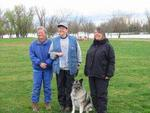
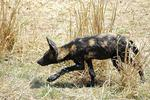
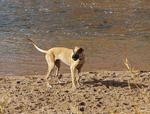
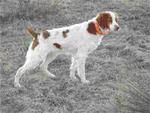
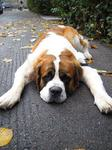
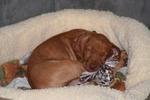
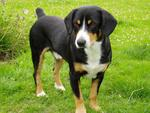
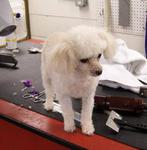
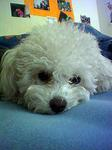
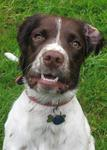
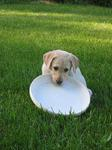
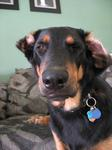
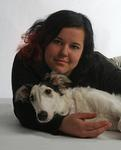
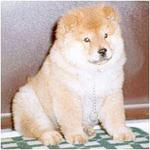
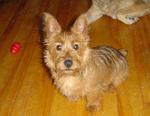
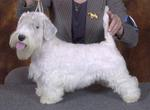
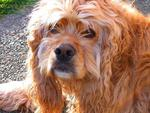
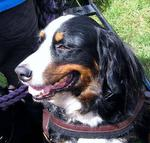
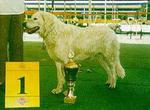
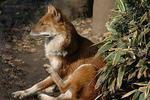

In [20]:
HTML(dogs[['breed', 'image']].to_html(formatters={'image': image_formatter}, escape=False))

In [23]:
import cv2

In [24]:
def plot_examples(category = 'scottish_deerhound'):
    """ Plot 5 images of a given category """
    
    fig, axs = plt.subplots(1, 5, figsize=(25, 20))
    fig.subplots_adjust(hspace = .1, wspace=.1)
    axs = axs.ravel()
    temp = labels_df[labels_df['breed']==category].copy()
    temp.index = range(len(temp.index))
    for i in range(5):
        id_ = temp.loc[i, 'id']
        breed = temp.loc[i, 'breed']
        file = id_+'.jpg'
        img = cv2.imread('C:/Users/gigig/Downloads/data/train data/'+file)
        axs[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[i].set_title(breed)
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
    plt.show()
    

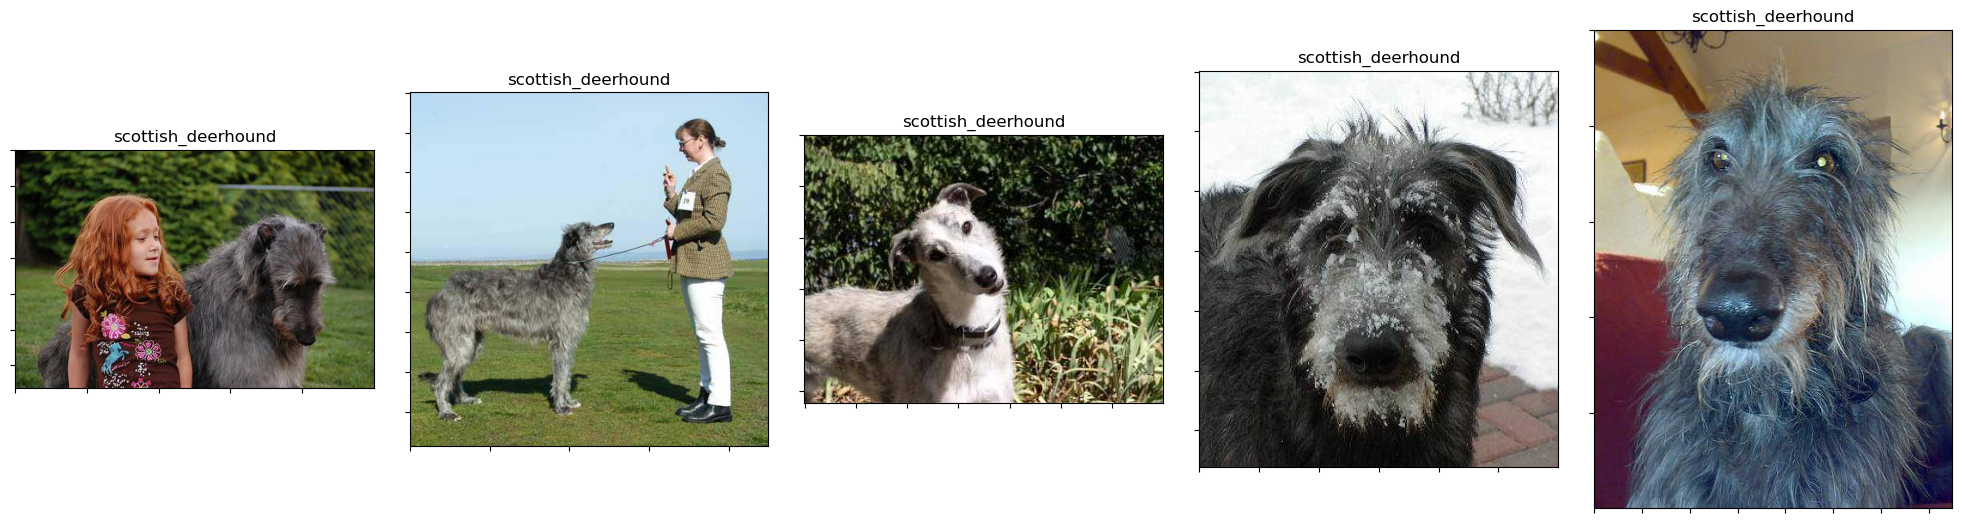

In [25]:
plot_examples()


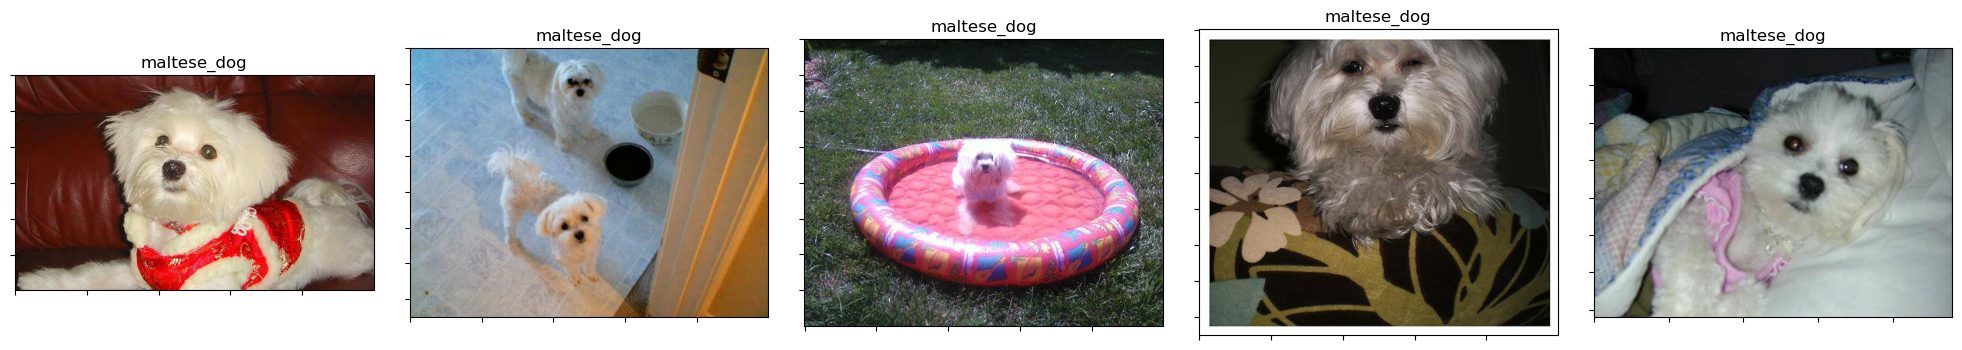

In [26]:
plot_examples('maltese_dog')

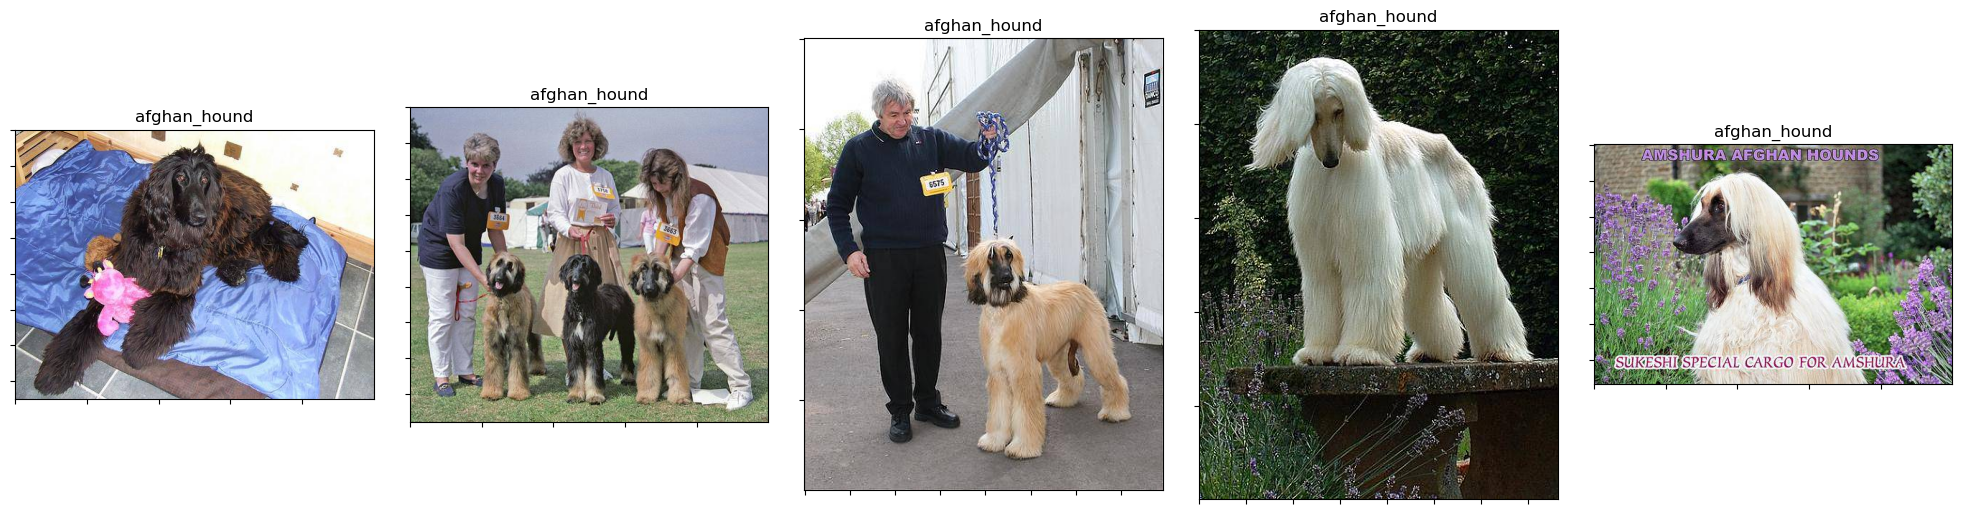

In [27]:
plot_examples('afghan_hound')

In [28]:
label_encoder = preprocessing.LabelEncoder()
labels_df['breed_label']= label_encoder.fit_transform(labels_df['breed'])
labels_df['breed_label'].unique()

array([ 19,  37,  85,  15,  49,  10,  18,   7,  97,  99, 113,  73,  79,
         2, 118,  89,  68,  21,  38,  83, 106,  58,  12,  26,   0,  67,
        55,  40, 114,  48,  54,  36, 110,  17, 109,  80, 100,  57,  66,
        46,  53,   8,   6,  95,  90,  56,   5,  14,  94,  77,  24,  63,
        84,  16,  42,  33,  71, 115,  29,  93,  88,  72,  65,   3,  69,
        74,  25,  11,   4,  70,  27,  60,  31,  96,   1,  82,  92,  75,
        43,  59,  22, 111,  30,  44,  81, 103, 104,  39,  50, 101,  78,
        23,  28,  35,  52,   9, 112, 116,  64, 117,  98, 105,  62,  61,
        76,  87,  34, 119,  86,  51,  13, 102, 107,  47,  45,  20, 108,
        41,  32,  91])

In [29]:
labels_df[labels_df['breed']=='dingo'].head()

id  breed  breed_label
1    001513dfcb2ffafc82cccf4d8bbaba97  dingo  37         
24   00a338a92e4e7bf543340dc849230e75  dingo  37         
43   0120343862761d052d6a7ade81625c94  dingo  37         
113  02b1c50fb7315423a664f3ce68c94e30  dingo  37         
258  060b163b5ad74c889c47b9f421825cdb  dingo  37

In [30]:
def image_preprocessing(image, image_size):
    """ Image Preprocessing """

    readFlag=cv2.COLOR_BGR2GRAY
    image_gray = cv2.cvtColor(image, readFlag)
    
    
    mid_row = int(image_gray.shape[0]/2)
    mid_col = int(image_gray.shape[1]/2)
    if image_gray.shape[0]>image_gray.shape[1]:
        image_cropped = image_gray[mid_row-mid_col:mid_row+mid_col,
                                   0:image_gray.shape[1]]
    else:
        image_cropped = image_gray[0:image_gray.shape[0],
                                   mid_col-mid_row:mid_col+mid_row]
    
    
    image_rescale = cv2.resize(image_cropped,
                               dsize=(image_size, image_size),
                               interpolation=cv2.INTER_AREA)
    return image_rescale

def plot_befor_after(image):
    """ Compare original and prepared image """
    
    fig, axs = plt.subplots(1, 2, figsize=(15, 10))
    fig.subplots_adjust(hspace = .1, wspace=.1)
    axs = axs.ravel()
    
    axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[0].set_title('original shape: '+str(image.shape))
    
    image_rescale = image_preprocessing(image, image_size)
    
    axs[1].imshow(image_rescale, cmap='gray')
    axs[1].set_title('rescaled shape: '+str(image_rescale.shape))
    for i in range(2):
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
    plt.show()

In [31]:
image_size = 128

Shape: (375, 500, 3)


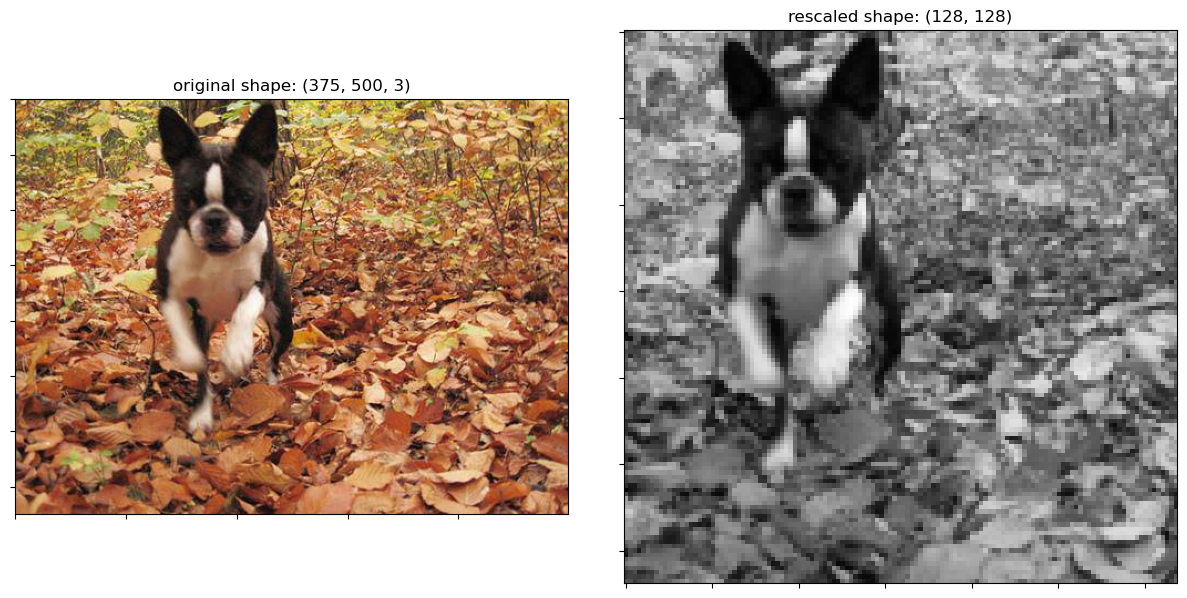

In [32]:
row = 0
id_ = labels_df.loc[row, 'id']
breed = labels_df.loc[row, 'breed']
file = id_+'.jpg'
image = cv2.imread('C:/Users/gigig/Downloads/data/train data/'+file)
print('Shape:', image.shape)
plot_befor_after(image)

Shape: (500, 375, 3)


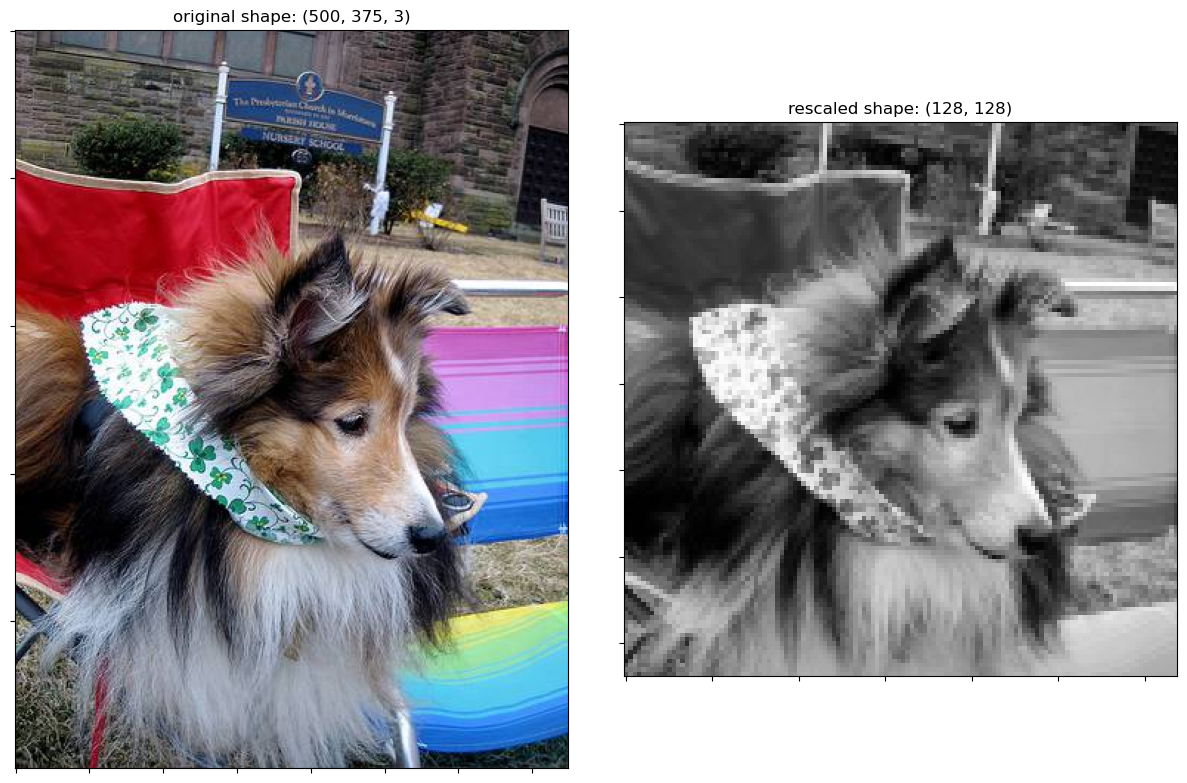

In [33]:
row = 10
id_ = labels_df.loc[row, 'id']
breed = labels_df.loc[row, 'breed']
file = id_+'.jpg'
image = cv2.imread('C:/Users/gigig/Downloads/data/train data/'+file)
print('Shape:', image.shape)
plot_befor_after(image)

In [34]:
def prepare_data(path, data, image_size):
    
    
    X = np.empty((len(data), image_size, image_size), dtype=np.uint8)
    for row in data.index:
        id_ = data.loc[row, 'id']
        file = id_ + '.jpg'
        image = cv2.imread(path+file)
        image_rescaled = image_preprocessing(image, image_size)
        X[row, :, :] = image_rescaled
    X = X.astype('float32')/255
    return X